In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
def PlotHistoByUncertainty(topic, sInput):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Uncertainty'].isin(sInput.keys())].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sInput)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [4]:
def PlotHistoByExp(topic, sExp):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Exponent'].isin(sExp.keys())].set_index('Exponent')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sExp)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [5]:
def PlotHistoByX(topic, sX):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Value'].isin(sX.keys())].set_index('Input Value')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sX)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [6]:
def PlotCompare(topic, leftLegend=(1,1), rightLegend=(1,0.2)):
    dfPlot = df.sort_values('Input Uncertainty')
    if 'Value Diff' not in dfPlot.columns:
        dfPlot['Value Diff'] = df['Mean']/df['Value'] - 1
    if 'Uncertainty Diff' not in dfPlot.columns:
        dfPlot['Uncertainty Diff'] = df['Deviation']/df['Uncertainty'] - 1

    fig, ax = plt.subplots()
    ax.set_title('Sampled vs Variance Arithmetic for ' + topic)
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    ax.set_xscale('log')
    ax.set_ylabel('Sampled vs Variance Arithmetic Error Ratio')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Value Diff'], f'g-', label='Mean vs Value')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Uncertainty Diff'], f'b-', label='Deviation vs Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    ax2.plot(dfPlot['Input Uncertainty'], dfPlot['Normalized Error Deviation'], f'm--', label='Error Deviation')

    ax.grid(True)
    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

In [7]:
def PlotEdge(topic, xLabel, leftLegend=(1.1,1), rightLegend=(1.1,0.1), sigma=0, xlim=[], ylog=False):
    fig, ax = plt.subplots()
    ax.set_title(f'{topic}')
    ax.set_xlabel(xLabel)
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel(r'Upper Bound $\delta x$')
    ax.grid(True)
    ax.plot(df['X'], df['Edge'], f'k-', label=r'Upper Bound $\delta x$')
    if sigma:
            ax.plot(df['X'], df['Edge']/sigma, f'k--', label=r'$\delta x = x/5$')

    ax2 = ax.twinx()
    if ylog:
        ax2.set_yscale('log')
    ax2.set_ylabel('Upper Bound Bias and Uncertainty')
    ax2.plot(df['X'], df['Bias'], c='gray', ls='--', label='Upper Bound Uncertainty Bias')
    ax2.plot(df['X'], df['Uncertainty'], c='gray', ls='-', label='Upper Bound Uncertainty')

    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

# Convergence Edge

## Power

In [61]:
df = pd.read_csv("../Python/Output/PowEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.00,0.19809,0.406410,1.406410,94.866508,NotMonotonicException: (1.000000e+00~1.981e-01...
1,-2.95,0.19813,0.385440,1.385440,80.094733,NotMonotonicException: (1.000000e+00~1.981e-01...
2,-2.90,0.19818,0.366343,1.366343,68.104630,NotMonotonicException: (1.000000e+00~1.982e-01...
3,-2.85,0.19823,0.348504,1.348504,57.861393,NotMonotonicException: (1.000000e+00~1.982e-01...
4,-2.80,0.19828,0.331793,1.331793,49.117552,NotMonotonicException: (1.000000e+00~1.983e-01...


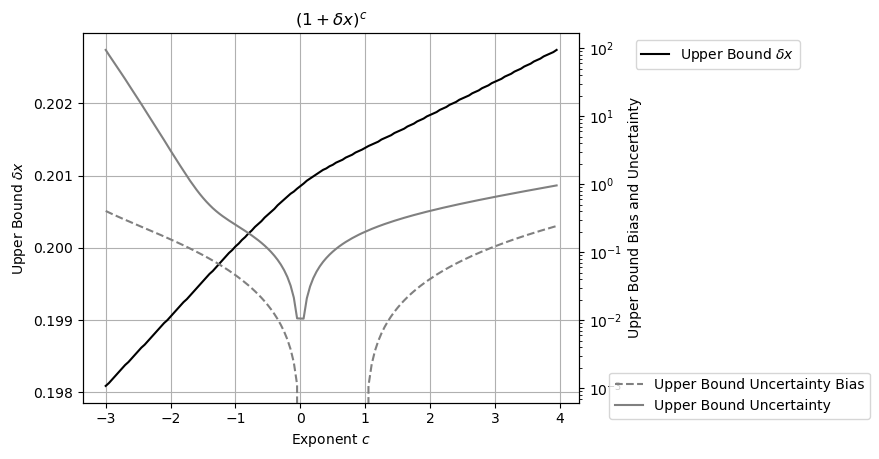

In [62]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', rightLegend=(1.6,0.1), ylog=True)

In [70]:
df = pd.read_csv("../Java/Output/PowEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.00,0.19809,0.406410,1.406410,94.866508,Type.NotMonotonicException
1,-2.95,0.19813,0.385440,1.385440,80.094733,Type.NotMonotonicException
2,-2.90,0.19818,0.366343,1.366343,68.104630,Type.NotMonotonicException
3,-2.85,0.19823,0.348504,1.348504,57.861393,Type.NotMonotonicException
4,-2.80,0.19828,0.331793,1.331793,49.117552,Type.NotMonotonicException


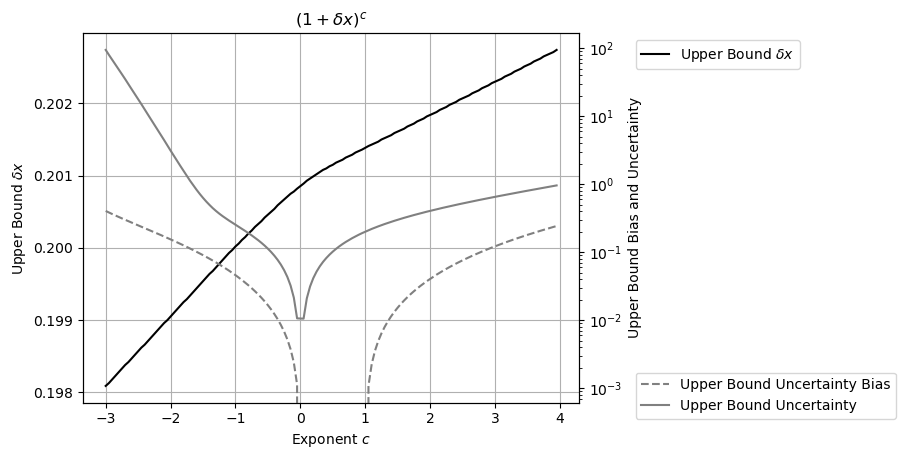

In [71]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', ylog=True)

In [65]:
df = pd.read_csv("../Cpp/Output/PowEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.00,0.19809,0.406410,1.406410,94.866508,NotMonotonicException
1,-2.95,0.19813,0.385440,1.385440,80.094733,NotMonotonicException
2,-2.90,0.19818,0.366343,1.366343,68.104630,NotMonotonicException
3,-2.85,0.19823,0.348504,1.348504,57.861393,NotMonotonicException
4,-2.80,0.19828,0.331793,1.331793,49.117552,NotMonotonicException


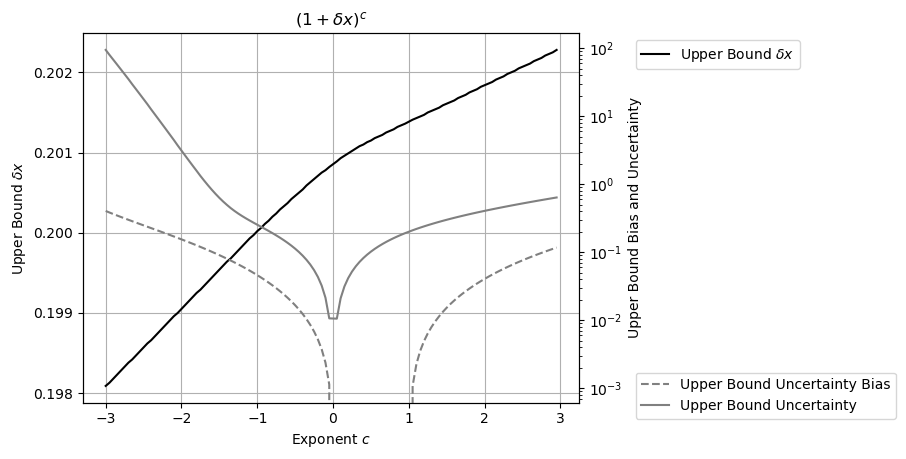

In [66]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', ylog=True)

# Sin

In [36]:
df = pd.read_csv("../Python/Output/SinEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-1.000000,0.318,4.811374e-17,-7.435094e-17,0.657319,NotPositiveException: sin(-3.141593e+00~1.002e...
1,-0.984375,0.318,1.927764e-02,-2.979004e-02,0.656892,NotPositiveException: sin(-3.092505e+00~1.002e...
2,-0.968750,0.319,3.869560e-02,-5.932154e-02,0.656267,NotPositiveException: sin(-3.043418e+00~1.005e...
3,-0.953125,0.320,5.820643e-02,-8.852404e-02,0.654808,NotPositiveException: sin(-2.994330e+00~1.008e...
4,-0.937500,0.321,7.776200e-02,-1.173283e-01,0.652536,NotPositiveException: sin(-2.945243e+00~1.012e...


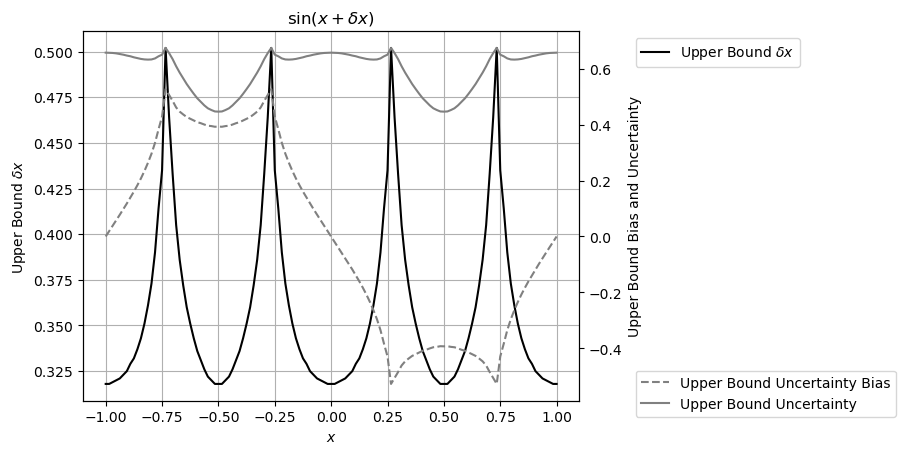

In [37]:
PlotEdge(topic=r'$\sin(x + \delta x)$', xLabel=r'$x$')

In [72]:
df = pd.read_csv("../Java/Output/SinEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.141593,1.0000,4.818606e-17,-7.427862e-17,0.657520,Type.NotPositiveException
1,-3.043418,1.0024,3.870939e-02,-5.930775e-02,0.656315,Type.NotPositiveException
2,-2.945243,1.0101,7.795708e-02,-1.171332e-01,0.652878,Type.NotPositiveException
3,-2.847068,1.0238,1.184076e-01,-1.718770e-01,0.647581,Type.NotPositiveException
4,-2.748894,1.0459,1.612205e-01,-2.214629e-01,0.641326,Type.NotPositiveException


In [73]:
df['Edge'] /= math.pi

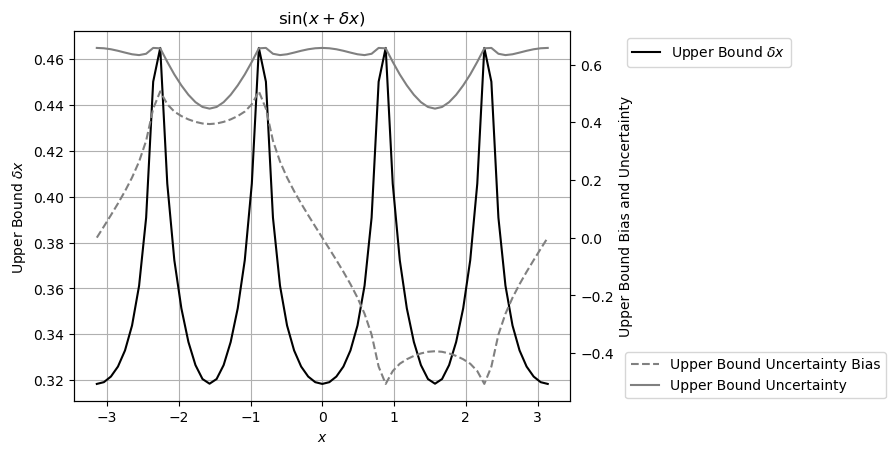

In [74]:
PlotEdge(topic=r'$\sin(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.65,0.15))

In [67]:
df = pd.read_csv("../Cpp/Output/SinEdge.txt", sep='\t')
df.head()

,X,Edge,Bias,Value,Uncertainty,Exception
0,-3.141593,1.0000,4.818447e-17,-7.427617e-17,0.657520,NotPositiveException
1,-3.043418,1.0024,3.870939e-02,-5.930775e-02,0.656315,NotPositiveException
2,-2.945243,1.0101,7.795708e-02,-1.171332e-01,0.652878,NotPositiveException
3,-2.847068,1.0238,1.184076e-01,-1.718770e-01,0.647581,NotPositiveException
4,-2.748894,1.0459,1.612205e-01,-2.214629e-01,0.641326,NotPositiveException


In [68]:
df['Edge'] /= math.pi

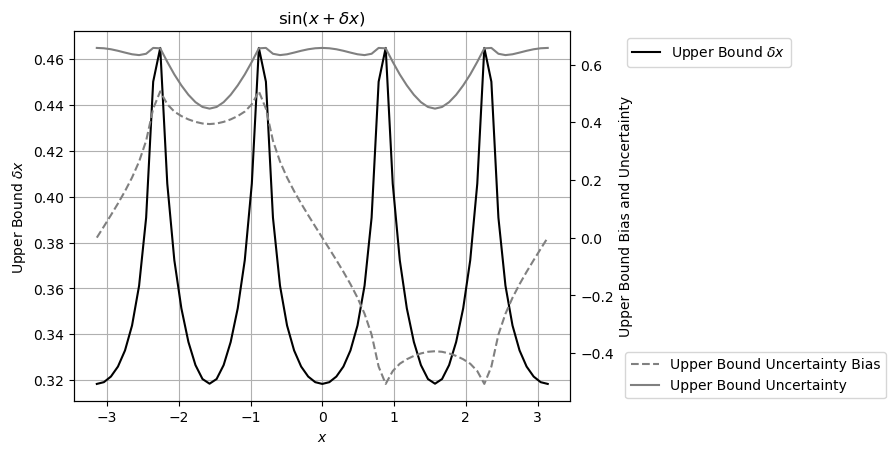

In [69]:
PlotEdge(topic=r'$\sin(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.65,0.15))

# Power

## Square

In [52]:
df = pd.read_csv("../Python/Output/SquareAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2.000000,1,0.2,1.039999,0.403976,1.041603,0.403430,0.003969,0.998649,0,...,0.033628,0.026386,0.021165,0.016085,0.011900,0.008711,0.006438,0.004557,0.003249,0.001368
1,1.999999,1,0.2,1.039999,0.403976,1.040131,0.405619,0.000326,1.004066,0,...,0.033135,0.026424,0.020417,0.016039,0.011934,0.008865,0.006953,0.004890,0.003059,0.001389
2,2.000001,1,0.2,1.039999,0.403977,1.037819,0.403702,-0.005397,0.999320,0,...,0.033111,0.026461,0.019418,0.015424,0.011792,0.008622,0.006479,0.004749,0.003320,0.001338


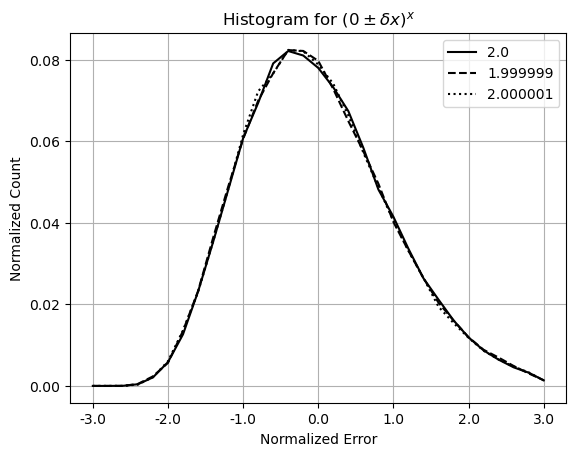

In [53]:
PlotHistoByExp(topic=r'$(0 \pm \delta x)^x$', sExp={2.0: 'k', 1.999999: 'k--', 2.000001: 'k:'})

In [54]:
df = pd.read_csv("../Python/Output/SquareAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,-0.2,0.2,0.079999,0.097976,0.080290,0.098492,0.002964,1.005271,0,...,0.021760,0.018065,0.015044,0.012309,0.010166,0.008104,0.007185,0.006073,0.004787,0.002266
1,2,-0.1,0.2,0.049999,0.069277,0.049950,0.069095,-0.000716,0.997363,0,...,0.018420,0.015629,0.012921,0.010845,0.009138,0.007789,0.006297,0.005254,0.004539,0.001983
2,2,0.0,0.2,0.039999,0.056563,0.039876,0.056142,-0.002176,0.992551,0,...,0.018262,0.015115,0.012744,0.010884,0.008349,0.007542,0.005825,0.005079,0.004006,0.001829
3,2,0.1,0.2,0.049999,0.069277,0.050213,0.069627,0.003083,1.005040,0,...,0.018040,0.015811,0.013141,0.010605,0.008979,0.007496,0.006218,0.005809,0.004663,0.002097
4,2,0.2,0.2,0.079999,0.097976,0.079744,0.098531,-0.002611,1.005668,0,...,0.021528,0.017792,0.014627,0.011637,0.009820,0.008850,0.007135,0.006114,0.004634,0.002246


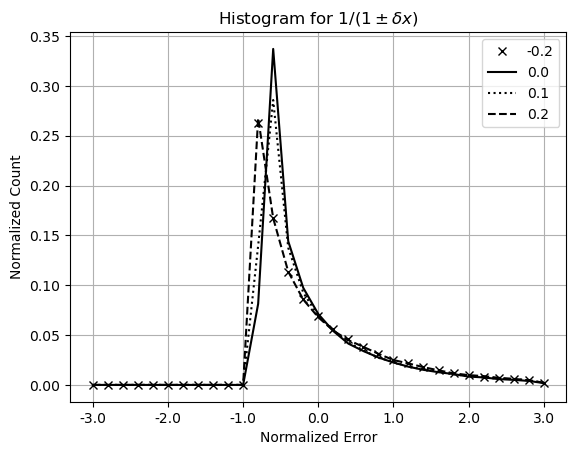

In [55]:
PlotHistoByX(topic=r'$1/(1 \pm \delta x)$', sX={0: 'k', 0.2: 'k--', 0.1: 'k:', -0.2: 'kx'})

## Inversion

In [56]:
df = pd.read_csv("../Python/Output/InversionAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,-1,1,0.2000,1.046250,0.254843,1.046302,0.249403,0.000205,0.978654,0,...,0.024139,0.018641,0.014661,0.011745,0.008738,0.006895,0.005022,0.004313,0.003189,0.001144
1,-1,1,0.1000,1.010316,0.104291,1.010524,0.104236,0.001996,0.999471,0,...,0.032623,0.024747,0.019197,0.015199,0.011270,0.008390,0.006073,0.004754,0.003344,0.001501
2,-1,1,0.0100,1.000100,0.010004,1.000134,0.010005,0.003390,1.000140,100,...,0.037252,0.029932,0.021519,0.016435,0.011381,0.007661,0.005244,0.002687,0.001755,0.000692
3,-1,1,0.0010,1.000001,0.001000,1.000012,0.001001,0.010719,1.000686,115,...,0.038935,0.031186,0.022796,0.016440,0.011438,0.007268,0.004541,0.002967,0.001614,0.000491
4,-1,1,0.0001,1.000000,0.000100,0.999999,0.000100,-0.009135,0.998013,126,...,0.037940,0.029548,0.021246,0.015982,0.011059,0.006858,0.004472,0.002446,0.001755,0.000511


In [57]:
df['Input Uncertainty'].unique()

array([2.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04])

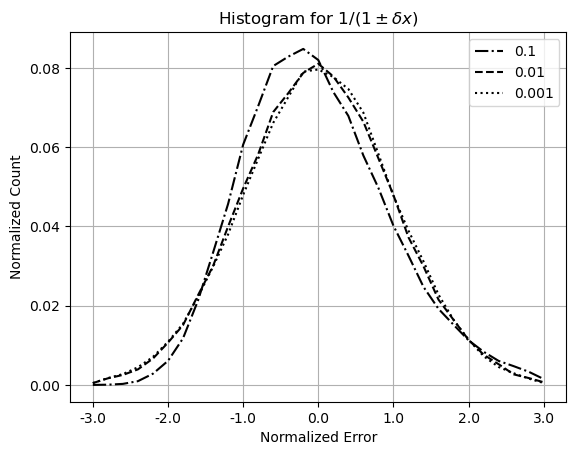

In [58]:
PlotHistoByUncertainty(topic=r'$1/(1 \pm \delta x)$', sInput={0.199802: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

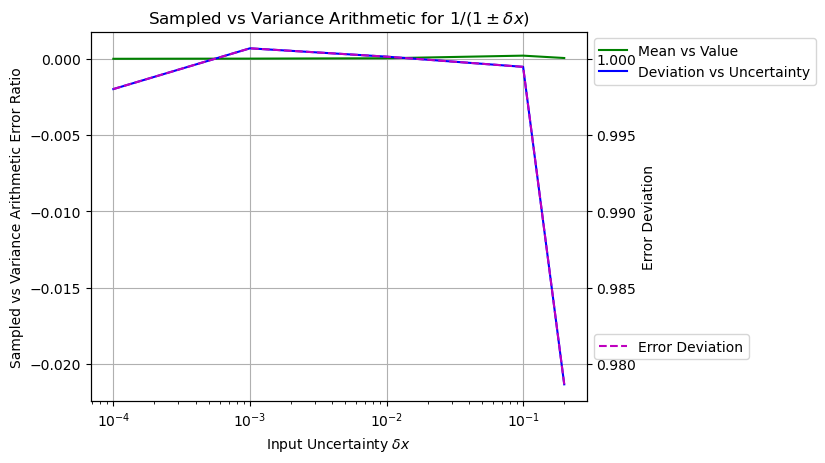

In [59]:
PlotCompare(topic=r'$1/(1 \pm \delta x)$')

## Square Root

In [60]:
df = pd.read_csv("../Python/Output/SquareRootAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.5,1,0.2011,0.994728,0.102551,0.994180,0.102961,-0.005341,1.003998,466,...,0.041965,0.031454,0.022349,0.014652,0.008833,0.005336,0.002784,0.001367,0.000703,0.000181
1,0.5,1,0.1000,0.998738,0.050224,0.998846,0.050513,0.002151,1.005763,271,...,0.040023,0.031144,0.023659,0.015512,0.010144,0.006431,0.003863,0.002137,0.001254,0.000341
2,0.5,1,0.0100,0.999987,0.005000,1.000000,0.005006,0.002424,1.001075,166,...,0.039170,0.030132,0.022559,0.015638,0.010933,0.007262,0.004444,0.002538,0.001515,0.000572
3,0.5,1,0.0010,1.000000,0.000500,0.999999,0.000501,-0.000993,1.002555,130,...,0.038444,0.029891,0.021679,0.016104,0.010920,0.007611,0.004663,0.002848,0.001544,0.000511


In [61]:
df['Input Uncertainty'].unique()

array([0.2011, 0.1   , 0.01  , 0.001 ])

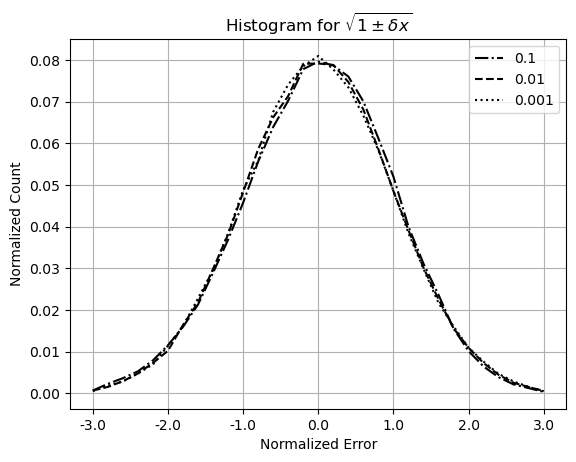

In [62]:
PlotHistoByUncertainty(topic=r'$\sqrt{1 \pm \delta x}$', sInput={0.20189: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

# Natural Power

In [12]:
df = pd.read_csv("../Python/Output/NaturalAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,0.0,0.2,0.039999,0.056563,0.039959,0.056374,-0.000713,0.996660,0,...,0.018389,0.015016,0.012522,0.009936,0.008137,0.007503,0.006266,0.005377,0.004457,0.002044
1,2,0.2,0.2,0.079999,0.097976,0.079873,0.097880,-0.001286,0.999016,0,...,0.021767,0.018044,0.015229,0.012607,0.009833,0.008619,0.006661,0.005804,0.004682,0.002142
2,3,0.0,0.2,0.000000,0.030972,-0.000118,0.031070,-0.003825,1.003146,1181,...,0.010047,0.006964,0.005663,0.004926,0.003912,0.003011,0.002816,0.002038,0.001843,0.000922
3,3,0.2,0.2,0.032000,0.061959,0.031738,0.061566,-0.004229,0.993666,16,...,0.014894,0.012798,0.009936,0.008863,0.007135,0.005857,0.004774,0.003976,0.003619,0.001452
4,3,-0.2,0.2,-0.032000,0.061959,-0.032090,0.062397,-0.001463,1.007068,2264,...,0.001617,0.000901,0.000655,0.000307,0.000246,0.000164,0.000072,0.000061,0.000031,0.000010


<AxesSubplot:title={'center':'$(x \\pm 0.2)^n$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

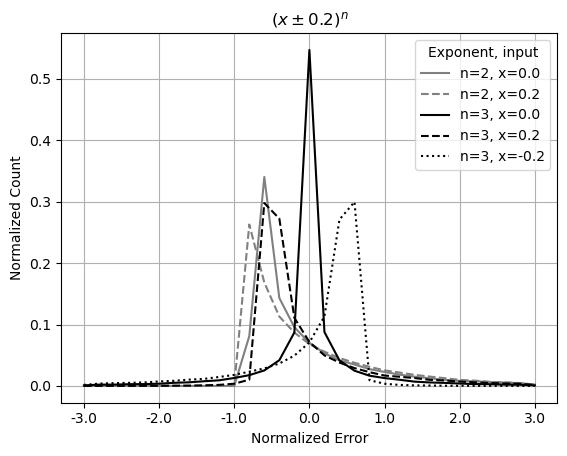

In [23]:
df['Exponent, input'] = 'n=' + df['Exponent'].astype('str') + ', x=' + df['Input Value'].astype('str')
dfPlot = df[(df['Exponent, input'] == 'n=2, x=0.0') | (df['Exponent, input'] == 'n=2, x=0.2')].set_index('Exponent, input')
sHisto = [str(i/10) for i in range(-30, 31, 2)]
ax = dfPlot[sHisto].T.plot(c='gray', style=['-', '--'])
dfPlot = df[(df['Exponent, input'] != 'n=2, x=0.0') & (df['Exponent, input'] != 'n=2, x=0.2')].set_index('Exponent, input')
dfPlot[sHisto].T.plot(title=r'$(x \pm 0.2)^n$', xlabel='Normalized Error', ylabel='Normalized Count', grid=True,
            c='black', style=['-', '--', ':'], ax=ax)

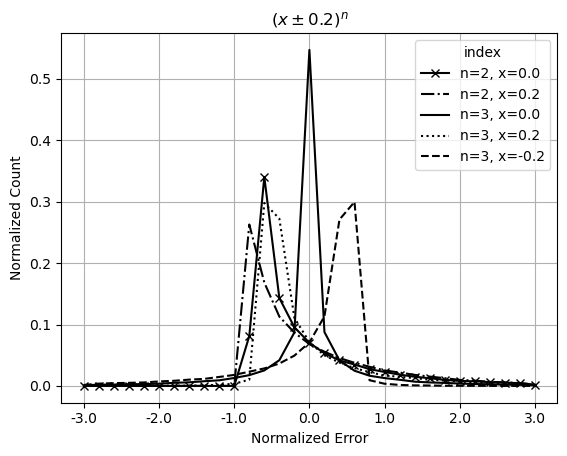

In [13]:
df['index'] = 'n=' + df['Exponent'].astype('str') + ', x=' + df['Input Value'].astype('str')
dfPlot = df.set_index('index')
sHisto = [str(i/10) for i in range(-30, 31, 2)]
ax = dfPlot[sHisto].T.plot(title=r'$(x \pm 0.2)^n$', xlabel='Normalized Error', ylabel='Normalized Count', grid=True,
            style=['k-x', 'k-.', 'k-', 'k:', 'k--'])

## Expansion

In [65]:
df = pd.read_csv("../Python/Output/PowerExpansion.txt", sep='\t')
df.head()

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
0,power,-1,1.0,0.19,2,1.000000,0.000000,3.610000e-02,1.604942e-35,0.036099,3.759893e-35,0.036099,1.618180e-35
1,power,-1,1.0,0.19,4,1.036099,0.036099,1.303210e-03,4.183152e-38,0.003909,1.131336e-36,0.010424,2.738582e-36
2,power,-1,1.0,0.19,6,1.040009,0.046524,4.704588e-05,8.177288e-41,0.000705,5.928567e-38,0.003244,2.596625e-37
3,power,-1,1.0,0.19,8,1.040714,0.049767,1.698356e-06,1.420896e-43,0.000178,5.198850e-39,0.001179,3.298049e-38
4,power,-1,1.0,0.19,10,1.040892,0.050946,6.131066e-08,2.314658e-46,0.000057,6.914483e-40,0.000499,5.753926e-39


In [66]:
df[(df['Input Uncertainty']==0.201) & (df['Order']>100)].head(10)

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
710,power,-1,1.0,0.201,102,1.046796,0.063580,8.433306e-72,3.566489e-173,3.929510e-07,3.339872e-43,0.000040,3.347753e-41
711,power,-1,1.0,0.201,104,1.046796,0.063620,3.407140e-73,5.935513e-176,3.893753e-07,3.344159e-43,0.000040,3.418931e-41
712,power,-1,1.0,0.201,106,1.046797,0.063660,1.376519e-74,9.874499e-179,3.860582e-07,3.351115e-43,0.000040,3.493064e-41
713,power,-1,1.0,0.201,108,1.046797,0.063700,5.561273e-76,1.642166e-181,3.829828e-07,3.360618e-43,0.000041,3.570180e-41
714,power,-1,1.0,0.201,110,1.046797,0.063741,2.246810e-77,2.730048e-184,3.801341e-07,3.372560e-43,0.000041,3.650317e-41
715,power,-1,1.0,0.201,112,1.046798,0.063783,9.077336e-79,4.537116e-187,3.774981e-07,3.386847e-43,0.000042,3.733517e-41
716,power,-1,1.0,0.201,114,1.046798,0.063825,3.667335e-80,7.537910e-190,3.750623e-07,3.403394e-43,0.000042,3.819825e-41
717,power,-1,1.0,0.201,116,1.046798,0.063867,1.481640e-81,1.251954e-192,3.728151e-07,3.422129e-43,0.000043,3.909293e-41
718,power,-1,1.0,0.201,118,1.046799,0.063910,5.985973e-83,2.078723e-195,3.707460e-07,3.442986e-43,0.000043,4.001979e-41
719,power,-1,1.0,0.201,120,1.046799,0.063953,2.418393e-84,3.450484e-198,3.688453e-07,3.465910e-43,0.000044,4.097941e-41


In [67]:
def PlotExpansion(topic, param, sInputUncertainty={0.201: '-', 0.200: ':', 0.199: '--'}):
    fig, ax = plt.subplots()
    ax.set_title('Taylor Expansion of Variance for ' + topic)
    ax.set_xlabel('Expansion Order')
    ax.set_ylabel('Taylor Expansion Terms')
    ax.set_yscale('log')
    ax.grid(True)
    
    for unc, style in sInputUncertainty.items():
        dfPlot = df[(df['Parameter']==param) & (df['Input Uncertainty']==unc)].sort_values('Order')
        ax.plot(dfPlot['Order'], dfPlot['New Variance Value'], c='black', ls=style, label=f'Variance $\delta x$={unc}')
        ax.plot(dfPlot['Order'], dfPlot['New Value Value'], c='gray', ls=style, label=f'Value $\delta x$={unc}')
        
    ax.legend(bbox_to_anchor=(1,1))


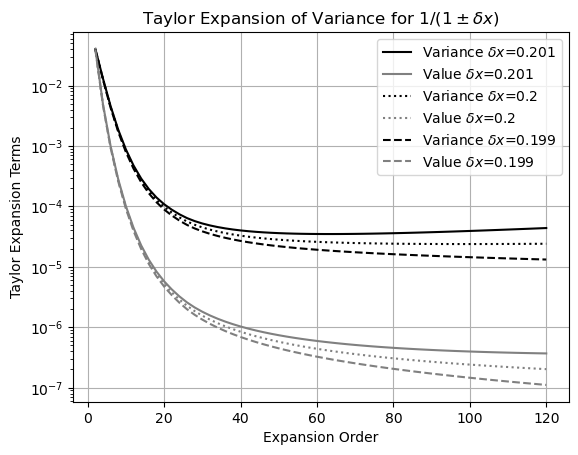

In [68]:
PlotExpansion(topic=r'$1/(1 \pm \delta x)$', param=-1)

# Imprecise Coefficients

In [20]:
df = pd.read_csv("../Python/Output/InversionAtOneImprecise.txt", sep='\t')
df.head()

,Taylor Uncertainty,Input Uncertainty,Value,Uncertainty
0,0.00,0.05,1.002519,0.050508
1,0.02,0.05,1.002519,0.054352
2,0.04,0.05,1.002519,0.064523
3,0.06,0.05,1.002519,0.078603
4,0.08,0.05,1.002519,0.094867


In [21]:
df['Input Uncertainty'].unique()

array([0.05   , 0.1    , 0.15   , 0.20002])

<AxesSubplot:title={'center':'$\\sum_{n = 0}^{\\infty} ((-1)^n \\pm \\delta y) y^n, y \\in N(0, \\delta x)$'}, xlabel='Taylor Uncertainty $\\delta y$', ylabel='Result Uncertainty'>

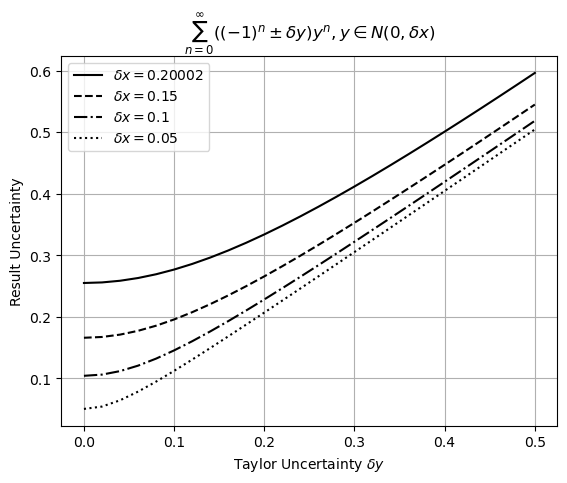

In [22]:
ax = df[df['Input Uncertainty'] == 0.20002].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.20002$', style='k-')
df[df['Input Uncertainty'] == 0.15].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.15$', style='k--', ax=ax)
df[df['Input Uncertainty'] == 0.1].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.1$', style='k-.', ax=ax)
df[df['Input Uncertainty'] == 0.05].plot(x='Taylor Uncertainty', y='Uncertainty', label=r'$\delta x = 0.05$', style='k:', ax=ax,
        grid=True, ylabel=r'Result Uncertainty',  xlabel=r'Taylor Uncertainty $\delta y$', 
        title=r'$\sum_{n = 0}^{\infty} ((-1)^n \pm \delta y) y^n, y \in N(0, \delta x)$')

In [26]:
df = pd.read_csv("../Python/Output/NormalMomentum_compare.txt", sep='\t')
df.head()

,Order,Var Value,Var Uncertainty,Var Precision,Var Diff,Float Diff,Float Uncertainty,Float Precision
0,0,0.999999,9.280575e-17,9.280580e-17,-2.220446e-16,0.0,6.409876e-17,6.409879e-17
1,2,0.999985,9.280575e-17,9.280718e-17,-5.551115e-16,0.0,6.409876e-17,6.409975e-17
2,4,2.999582,2.661649e-16,8.873401e-17,5.329071e-15,0.0,2.563950e-16,8.547692e-17
3,6,14.988618,1.286567e-15,8.583625e-17,2.664535e-14,0.0,1.025580e-15,6.842393e-17
4,8,104.688026,8.365524e-15,7.990908e-17,-3.979039e-13,0.0,8.204641e-15,7.837229e-17


<AxesSubplot:title={'center':'Bounded Momentum $\\zeta(2n, 5)$'}, xlabel='Order 2n', ylabel='Precision'>

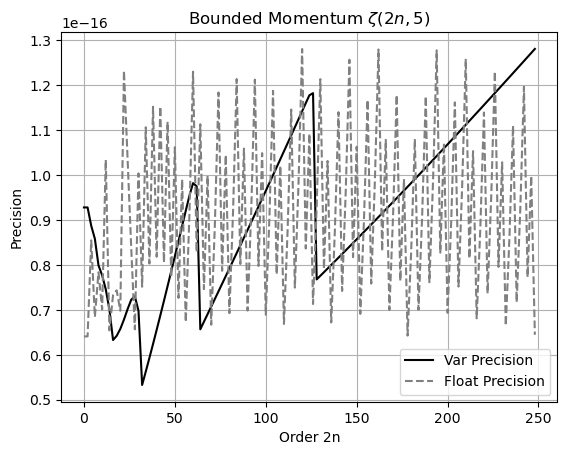

In [33]:
ax = df.plot(x='Order', y='Var Precision', c='black')
df.plot(x='Order', y='Float Precision', c='gray', ls='--', xlabel=r'Order 2n', ylabel='Precision', grid=True, 
        title=r'Bounded Momentum $\zeta(2n, 5)$', ax=ax)